# 01_Initialization

In [2]:
from safedigital import mechanical as ME  # import mechanical module
from datetime import datetime
from datetime import timedelta
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from MRC.sswgmm_mech import mech_monitor as mm
sns.set(color_codes=True)
cur_directory = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics'
dir_data_washed = (cur_directory + '\\' +
                   '20230427_ME_SA12kV_SGCC_VVV_V3_Life_Test' + '\\'
                   + '1_Data formatted')
dir_data_raw = (cur_directory + '\\' +
                '20230427_ME_SA12kV_SGCC_VVV_V3_Life_Test' + '\\' +
                '0_Data original')

# 02_Data re-organization

In [3]:
# for all data, split and save each curve into one single .csv file
travel_path_list = []
wave_class_dict = {'角度(合闸).txt': 'travel_close', '角度(分闸).txt': 'travel_open',
                   '合闸电流(合闸).txt': 'current_close', '分闸电流(分闸).txt': 'current_open',
                   '储能电流(储能).txt': 'current_motor'}
for cur_dir, dirs, files in os.walk(dir_data_raw):
    print(cur_dir)
    for wave_class in wave_class_dict.keys():
        if wave_class in files:
            wave_path = os.path.join(cur_dir, wave_class)
            # print(travel_path)
            travel_path_list.append(wave_path)
            with open(wave_path, "r", encoding='utf-8') as f:
                data = f.read()
            wave_list = data.split("Wave ID:")
            # since the 1st element is blank, wave data splitting from 2nd element
            for wave_str in wave_list[1:]:
                # extract timestamp to be name of waveform file
                time_stamp_start_idx = wave_str.find('Waveform Time:') + len('Waveform Time:')
                time_stamp_end_idx = wave_str.find(';Sampling Frequency(ms)')
                time_stamp_str = wave_str[time_stamp_start_idx: time_stamp_end_idx]

                # change format of time stamp into 'XX_XX_XX'
                time_stamp_num = time_stamp_str.replace(' ', '_')
                time_stamp_num = time_stamp_num.replace(':', '_')
                time_stamp_num = time_stamp_num.replace('-', '_')

                # extract waveform data
                wave_data_start_idx = wave_str.find('Waveform Data:') + len('Waveform Data:')
                wave_data_str = wave_str[wave_data_start_idx:]
                wave_data_df = pd.DataFrame({'Data': wave_data_str.split(',')})

                # export data into .csv file
                wave_file_name = time_stamp_num + '_' + wave_class_dict[wave_class]
                wave_data_df.to_csv(dir_data_washed + '\\' + wave_file_name + '.csv')


            else:
                pass
    else:
        pass
    print(travel_path_list)

C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20230427_ME_SA12kV_SGCC_VVV_V3_Life_Test\0_Data original
[]
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20230427_ME_SA12kV_SGCC_VVV_V3_Life_Test\0_Data original\20230427_0-878 cyc
['C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\\06_Test and Analytics\\20230427_ME_SA12kV_SGCC_VVV_V3_Life_Test\\0_Data original\\20230427_0-878 cyc\\角度(合闸).txt', 'C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\\06_Test and Analytics\\20230427_ME_SA12kV_SGCC_VVV_V3_Life_Test\\0_Data original\\20230427_0-878 cyc\\角度(分闸).txt', 'C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\\06_Test and Analytics\\20230427_ME_SA12kV_SGCC_VVV_V3_Life_Test\\0_Data original\\20230427_0-878 cyc\\合闸电流(合闸).txt', 'C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\\06_Test and Analytics\\20230427_ME_SA12kV_SGCC_VVV_V3_Life

# 03_Data plotting
## open travel curves

number of open trave curves: 4355


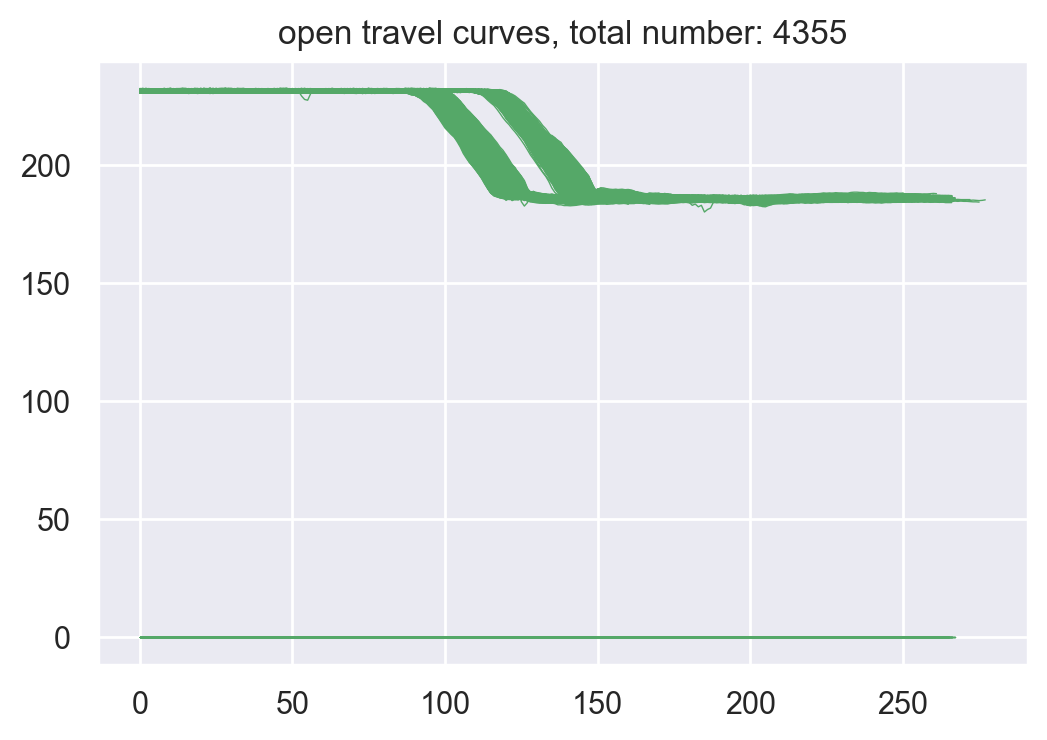

In [4]:
count_travel_open = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):

    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:
        # exclusion of data on 20230428
        if ('travel_open' in file) and ('2023_4_28' not in file):
            count_travel_open += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['Data'],
                     c='g',
                     linewidth=0.5)
plt.title('open travel curves, total number: {}'.format(count_travel_open))
print('number of open trave curves:', count_travel_open)

## close travel curves

number of close travel curves: 3854


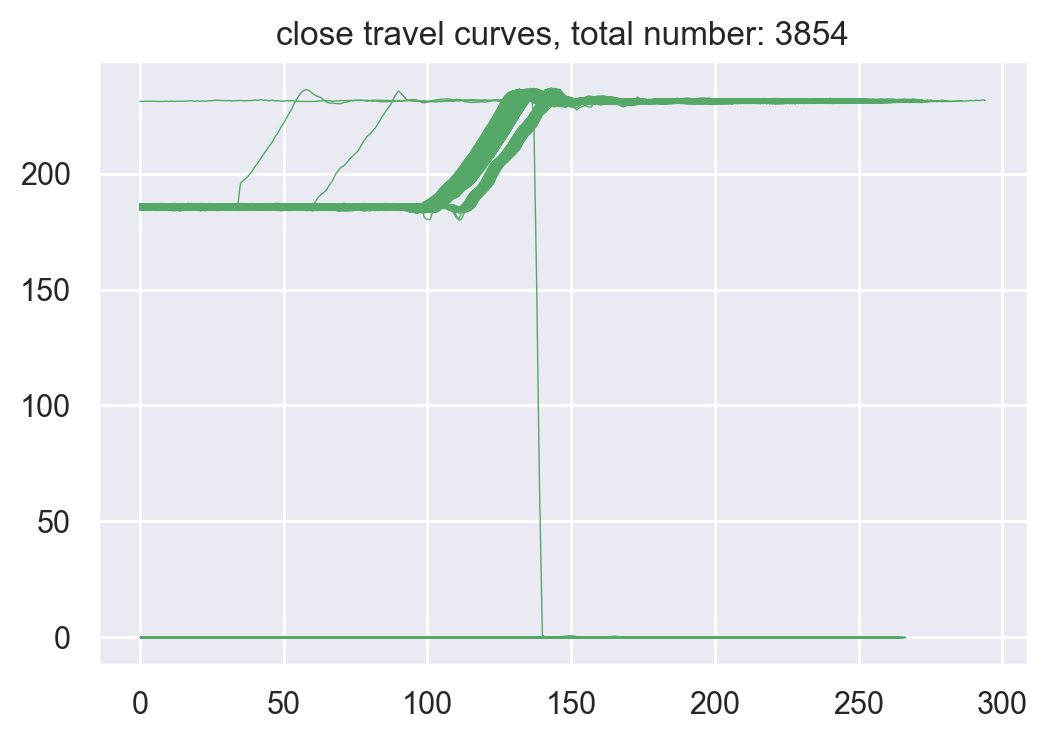

In [5]:
count_travel_close = 0
count_valid = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):

    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if ('travel_close' in file) and ('2023_4_28' not in file):
            count_travel_close += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['Data'],
                     c='g',
                     linewidth=0.5)
plt.title('close travel curves, total number: {}'.format(count_travel_close))
print('number of close travel curves:', count_travel_close)

## open coil current

number of open coil current curves: 4355


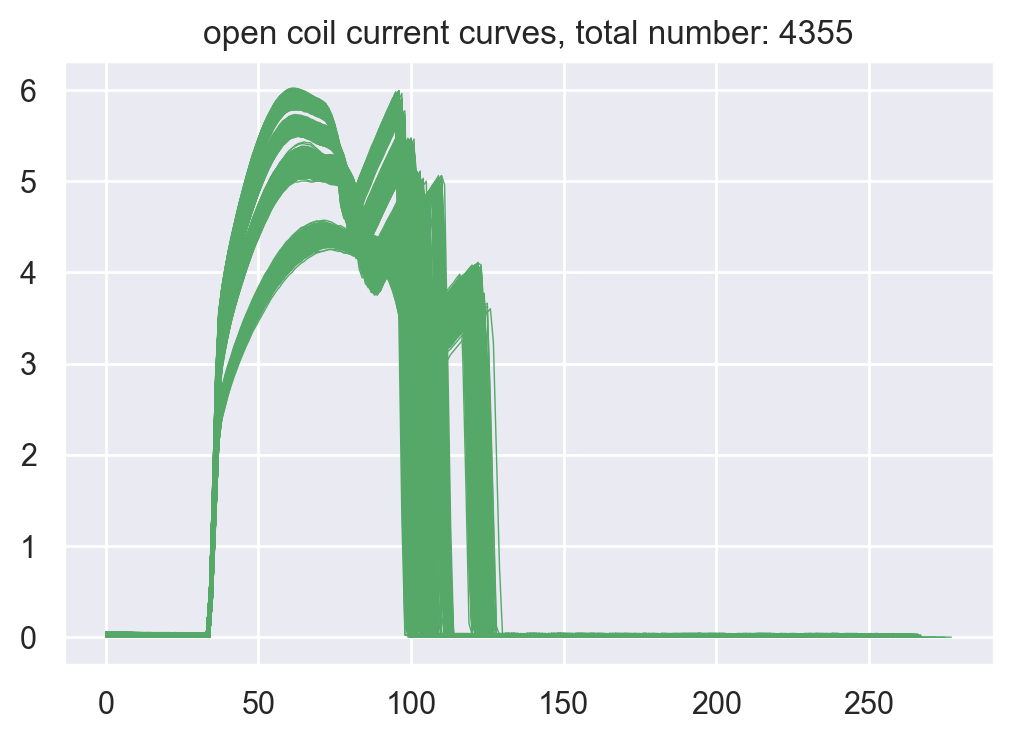

In [6]:
count_current_open = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):

    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if ('current_open' in file) & ('2023_4_28' not in file):

                count_current_open += 1
                curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
                if (100 > np.max(curve_df['Data']) >= 0):
                    plt.plot(curve_df['Data'],
                             c='g',
                             linewidth=0.5)
                elif (np.max(curve_df['Data']) >= 10):
                    print('invalid curve file name:', file)
                else:
                    pass
plt.title('open coil current curves, total number: {}'.format(count_current_open))
print('number of open coil current curves:', count_current_open)

## close coil current

number of close coil current curves: 4357


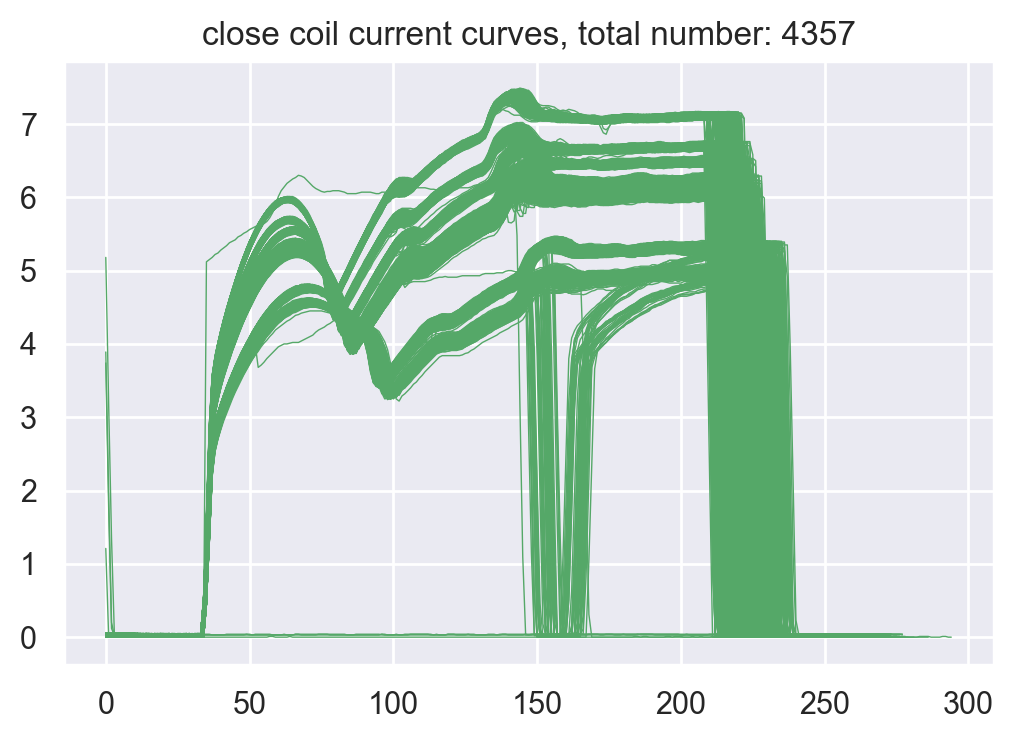

In [7]:
count_current_close = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):

    # plot close coil current curve
    plt.figure(dpi=200)
    for file in files:

        if ('current_close' in file) & ('2023_4_28' not in file):
            count_current_close += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['Data'],
                     c='g',
                     linewidth=0.5)

plt.title('close coil current curves, total number: {}'.format(count_current_close))
print('number of close coil current curves:', count_current_close)

## motor charge curve

Text(0.5, 1.0, 'motor current curves, total number: 4492')

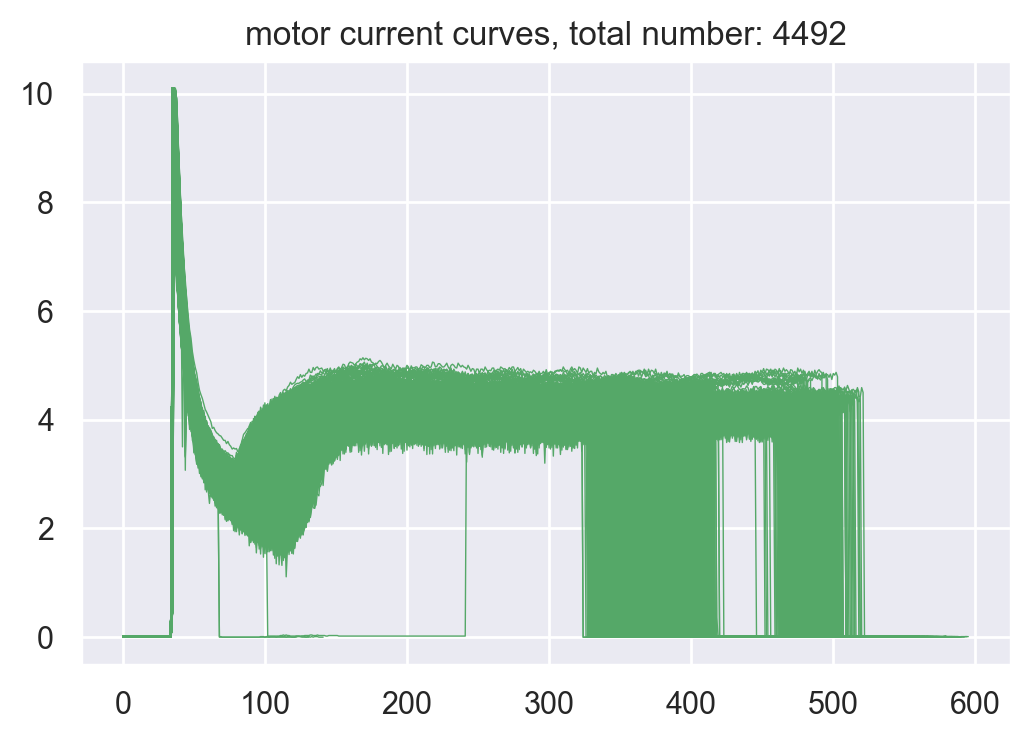

In [8]:
count_motor_current = 0
fig, ax = plt.subplots(dpi=200)
for cur_dir, dirs, files in os.walk(dir_data_washed):

    # plot motor current curve

    for file in files[:]:
        if 'current_motor' in file:
            count_motor_current += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            if 0.1 < np.mean(curve_df['Data']) < 10:
                ax.plot(curve_df['Data'],
                        c='g',
                        linewidth=0.5)
            else:
                print('invalid curve file name:', file)
                plt.figure()
                plt.plot(curve_df['Data'],
                         c='g',
                         linewidth=0.5)
                plt.title('invalid curve {}'.format(file))

ax.set_title('motor current curves, total number: {}'.format(count_motor_current))

# 04_Parameter calculation

## Open coil current

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
open coil current 0.44    5.20    5.24    5.56    4.83    4.86    4.04    1.53    24.00   76.00   


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


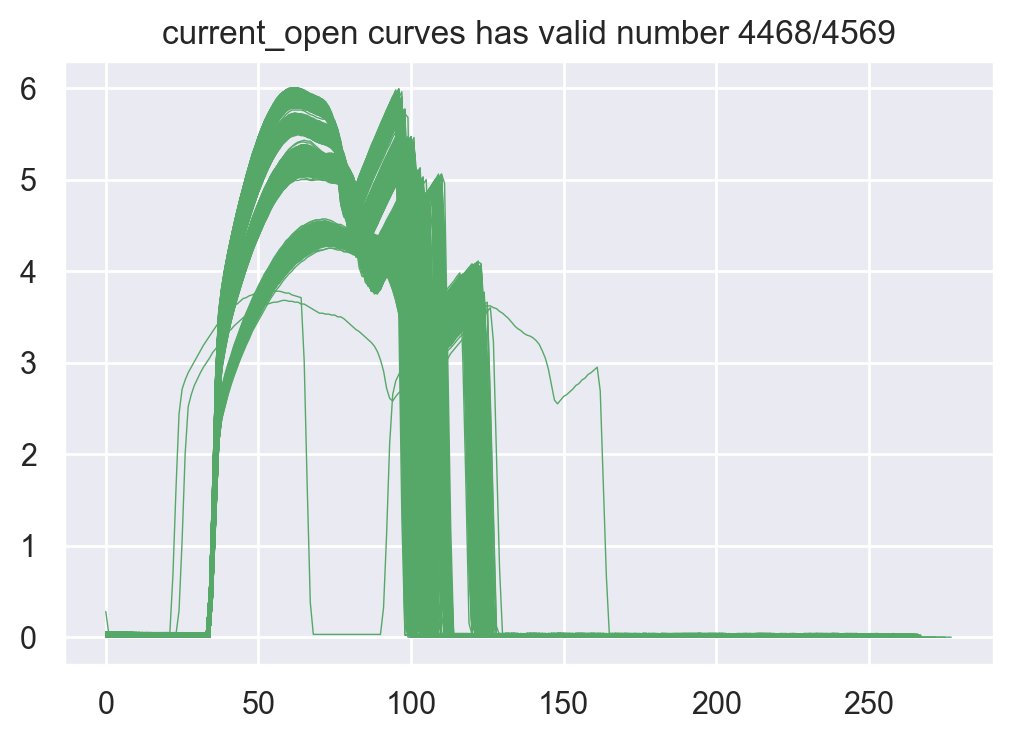

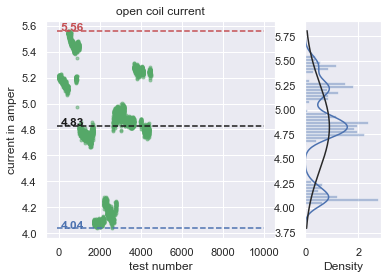

In [18]:
# preview
cur_val_list = ME.DataClean.curve_preview(dir_data_washed, 
                                        'current_open', 
                                        up_thr=6, 
                                        low_thr=0, 
                                        avg_min=0.1, 
                                        head_up_thr=0.1,
                                        tail_up_thr=0.5
                                        )   

# for each valid curve, calculate parameter
open_cur_list = []
for file in cur_val_list:

    coil_current_df = pd.read_csv(os.path.join(dir_data_washed, file),
                                    header=0)
    coil_current_arr = np.array(coil_current_df['Data'])
    
    # calculate current parameters
    _, _, _, _, current_avg = ME.MechOperMconfig.cal_cur_avg_noself(coil_current_arr,
                                                                    invalid_title='invalid_open_current_curve {}'.format(file))
    if current_avg >=3.6:
        open_cur_list.append(current_avg)
    else:
        pass

# distribution plot
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std',
                                                                        'start', 'end',
                                                                        'max', 'mean',
                                                                        'median', 'min',
                                                                        'span', 'alm_u',
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(open_cur_list,
                                  title='open coil current',
                                  ylabel='current in amper')

## Close coil current

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
close coil current0.60    5.87    6.07    6.55    5.50    5.46    3.63    2.92    23.00   77.00   


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


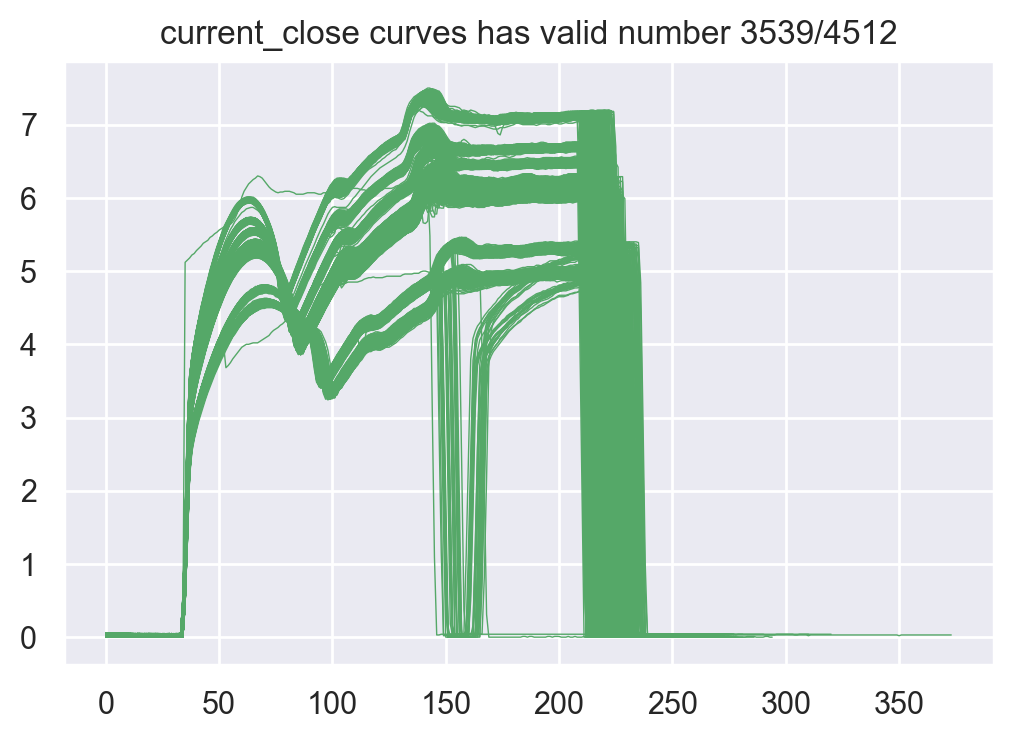

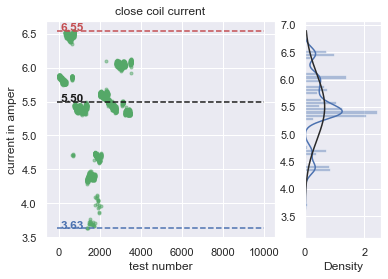

In [22]:
# preview
cur_val_list = ME.DataClean.curve_preview(dir_data_washed, 
                                        'current_close', 
                                        up_thr=10, 
                                        low_thr=0, 
                                        avg_min=0.1, 
                                        head_up_thr=0.1,
                                        tail_up_thr=0.5
                                        )   

# for each valid curve, calculate parameter
close_cur_list = []
for file in cur_val_list:

    coil_current_df = pd.read_csv(os.path.join(dir_data_washed, file),
                                    header=0)
    coil_current_arr = np.array(coil_current_df['Data'])
    
    # calculate current parameters
    _, _, _, _, current_avg = ME.MechOperMconfig.cal_cur_avg_noself(coil_current_arr,
                                                                    invalid_title='invalid_close_current_curve {}'.format(file))
    # if current_avg >=3.6:
    close_cur_list.append(current_avg)
    # else:
    #     pass

# distribution plot
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std',
                                                                        'start', 'end',
                                                                        'max', 'mean',
                                                                        'median', 'min',
                                                                        'span', 'alm_u',
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(close_cur_list,
                                  title='close coil current',
                                  ylabel='current in amper')

## motor current

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
motor current     0.21    4.36    4.07    4.90    4.07    4.06    3.55    1.35    40.00   60.00   
charge time       1.02    7.33    6.10    9.72    7.21    6.94    5.76    3.96    60.00   40.00   


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

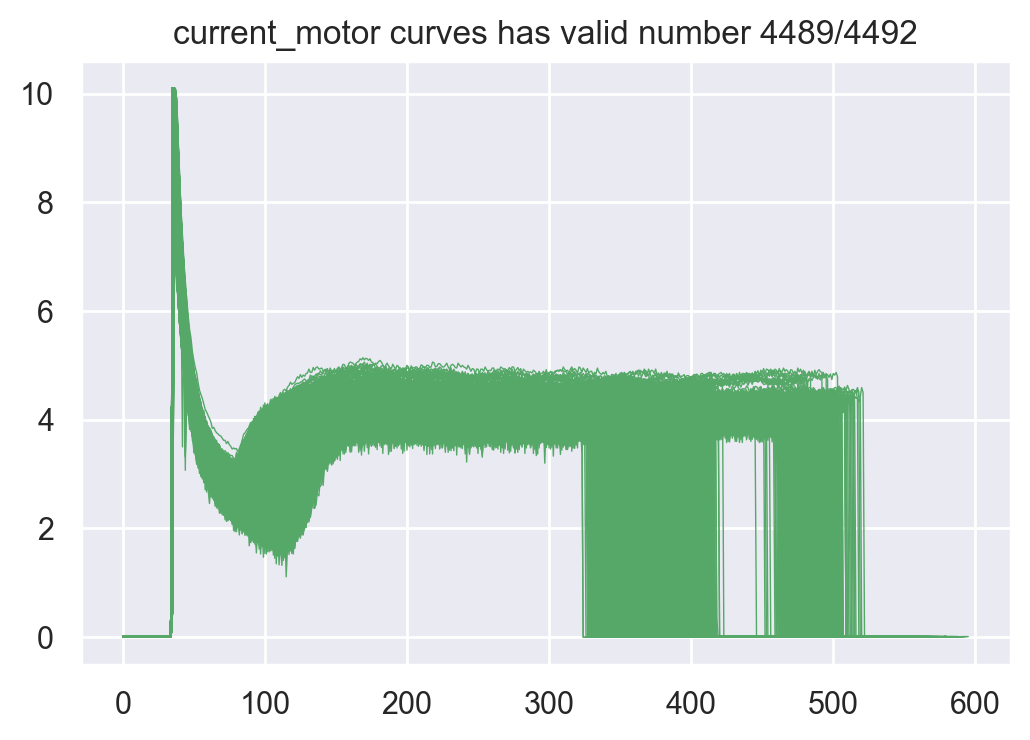

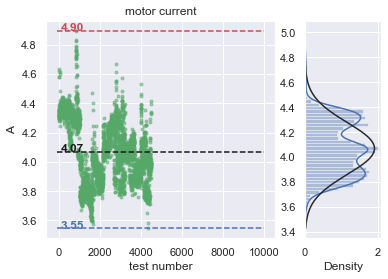

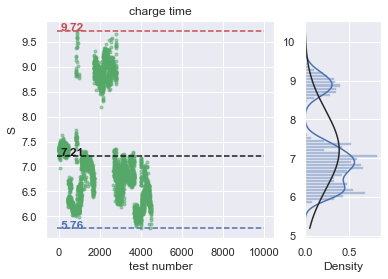

In [31]:
# preview
val_list = ME.DataClean.curve_preview(dir_data_washed, 
                                      'current_motor', 
                                    #   up_thr=2, 
                                    #   low_thr=0, 
                                      avg_min=2.5, 
                                    #   tail_up_thr=0.3,
                                      )

# for each valid curve, calculate parameter
motor_curr_list, charge_time_list = [], []
cnt_inval = 0
for file in val_list:

    current_df = pd.read_csv(os.path.join(dir_data_washed, file),
                             header=0)
    current_arr = np.array(current_df['Data'])
    
    # calculate current parameters
    start_ix, end_ix, left_ix, right_ix, current_avg, charge_time = ME.MechOperMconfig.cal_motor_para_noself(current_arr,
                                                                                                            # threshold=0.25,
                                                                                                            )
    if (charge_time <= 4) or (current_avg <= 3):
        plt.figure()
        plt.plot(current_arr)
    else:
        motor_curr_list.append(current_avg)
        charge_time_list.append(charge_time)

# distribution plot

print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std',
                                                                        'start', 'end',
                                                                        'max', 'mean',
                                                                        'median', 'min',
                                                                        'span', 'alm_u',
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(motor_curr_list,
                                  title='motor current',
                                  ylabel='A')
ME.MechOperMconfig.para_dist_plot(charge_time_list,
                                  title='charge time',
                                  ylabel='S')